<a href="https://www.kaggle.com/code/maderanadi/tess-groupproject?scriptVersionId=230867187" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa 
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sb 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

> Dataset Direktori

In [2]:
data_dir = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data"

> Menyimpan file dan label 

In [3]:
audio_files = []
labels = []

In [4]:
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)

    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                audio_files.append(os.path.join(folder_path, file))
                labels.append(folder)

df = pd.DataFrame({"file_path": audio_files, "label": labels})

df["label"] = df["label"].apply(lambda x: x.split("_")[-1])

print(df.head())

                                           file_path label
0  /kaggle/input/toronto-emotional-speech-set-tes...  fear
1  /kaggle/input/toronto-emotional-speech-set-tes...  fear
2  /kaggle/input/toronto-emotional-speech-set-tes...  fear
3  /kaggle/input/toronto-emotional-speech-set-tes...  fear
4  /kaggle/input/toronto-emotional-speech-set-tes...  fear


> EDA

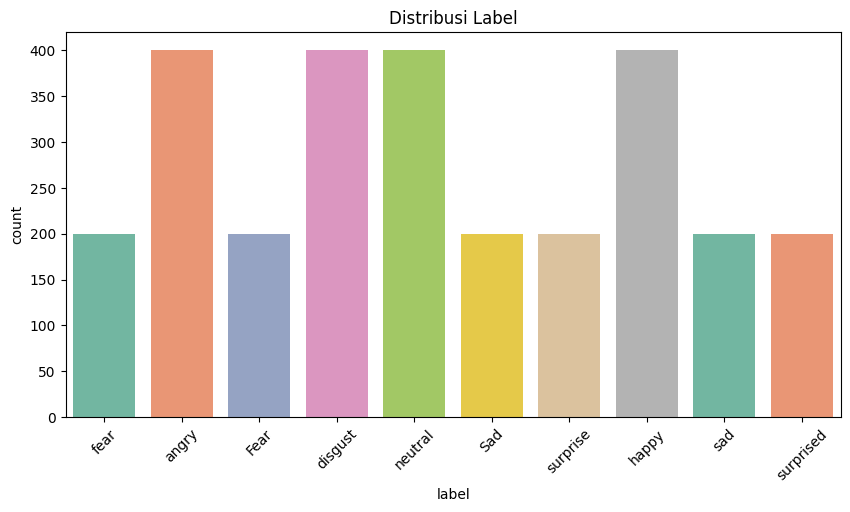

In [5]:
plt.figure(figsize=(10,5))
sb.countplot(x=df["label"], palette="Set2")
plt.title("Distribusi Label")
plt.xticks(rotation=45)
plt.show()

In [6]:
df["label"] = df["label"].str.lower()
label_mapping = {
    "fear" : "fear",
    "Fear" : "fear",
    "sad"  : "sad",
    "Sad"  : "sad",
    "surprise" : "surprise",
    "surprised" : "surprise"
}

df["label"] = df["label"].replace(label_mapping)

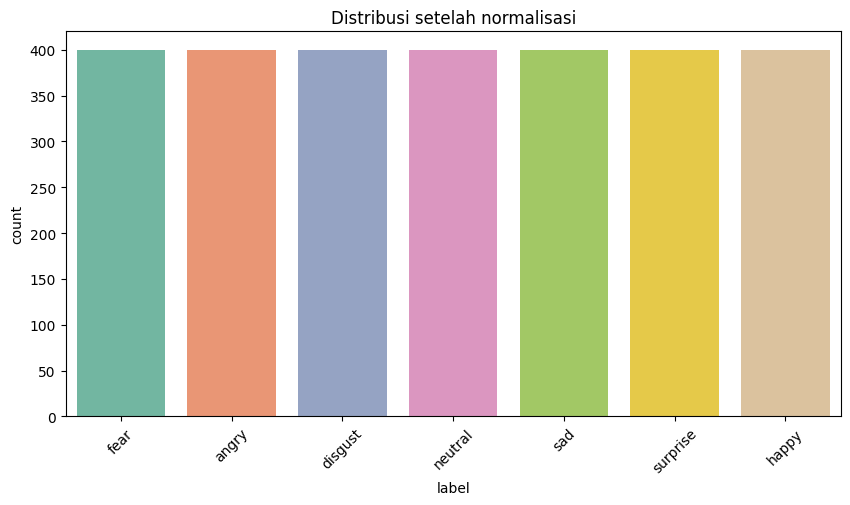

In [7]:
plt.figure(figsize=(10,5))
sb.countplot(x=df["label"], palette="Set2")
plt.title("Distribusi setelah normalisasi")
plt.xticks(rotation=45)
plt.show()

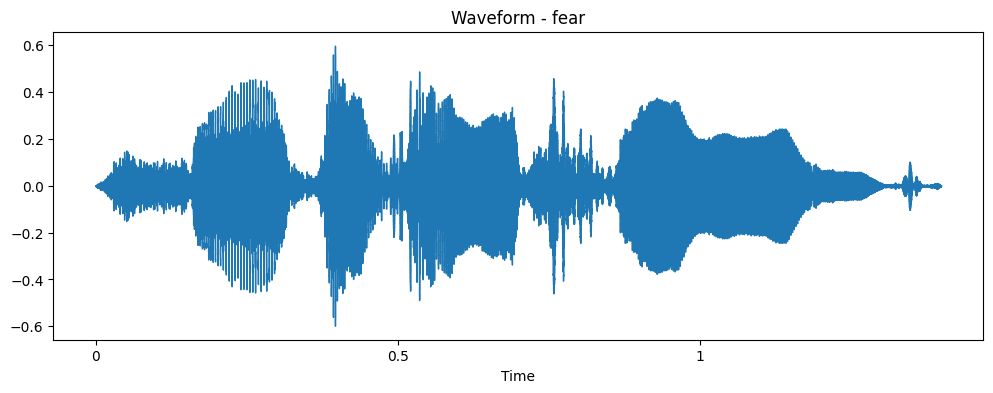

In [8]:
sample_audio = df.iloc[0]["file_path"]
y, sr = librosa.load(sample_audio, sr=None)

plt.figure(figsize=(12,4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform - {df.iloc[0]['label']}")
plt.show()

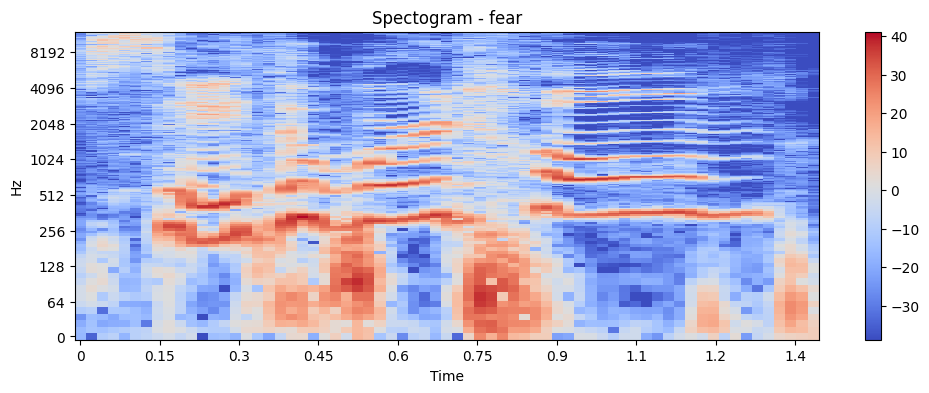

In [9]:
plt.figure(figsize=(12,4))
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="log")
plt.colorbar()
plt.title(f"Spectogram - {df.iloc[0]['label']}")
plt.show()